In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\tycs 14\\DW\\OnlineRetail.csv", encoding='unicode_escape')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [29]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [30]:
data.dropna(inplace = True)
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [31]:
data['Total_Amount'] = data['Quantity']*data['UnitPrice']

In [32]:
m = data.groupby('CustomerID')['Total_Amount'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,CustomerID,Total_Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [33]:
f = data.groupby('CustomerID')['InvoiceNo'].count()
f =f.reset_index()
f.columns = ['CustomerID','Frequency']
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [34]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
last_day = max(data['InvoiceDate'])
#last_day = '24-04-2011 8.26'

In [35]:
data['difference'] = last_day - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [36]:
def get_days(x):
    y = str(x).split()[0]
    return int(y)
data['difference'] = data['difference'].apply(get_days)

In [37]:
r = data.groupby('CustomerID')['difference'].min()
r = r.reset_index()
r.columns = ['CustomerID','Recency']
r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [38]:
grouped_df = pd.merge(m, f, on = 'CustomerID',how = 'inner')
RFM_df = pd.merge(grouped_df, r, on ='CustomerID', how = 'inner')
RFM_df.columns = ['CustomerID','Monetary','Frequency','Recency']

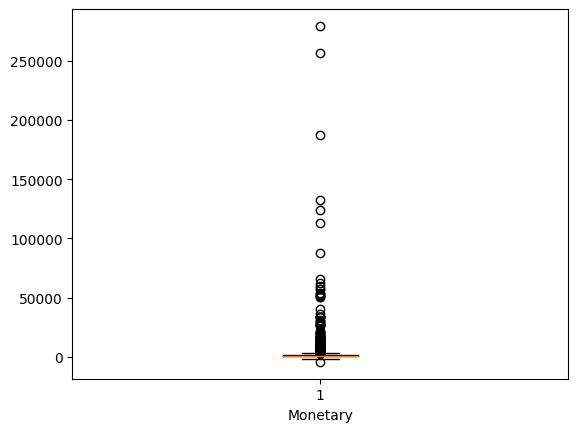

In [39]:
plt.boxplot(RFM_df['Monetary'])
plt.xlabel('Monetary')
plt.show()

In [40]:
outlier_vars = ['Monetary','Recency','Frequency']
for column in outlier_vars:
    
    lower_quartile = RFM_df[column].quantile(0.25)
    upper_quartile = RFM_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = RFM_df[(RFM_df[column] < min_border) |     (RFM_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    RFM_df.drop(outliers, inplace = True)

423 outliers detected in column Monetary
81 outliers detected in column Recency
239 outliers detected in column Frequency


In [41]:
scaled_df = RFM_df[['Monetary','Frequency','Recency']]
scale_standardisation = StandardScaler()
rfm_df_scaled = scale_standardisation.fit_transform(scaled_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary','frequency','recency']

In [42]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3)

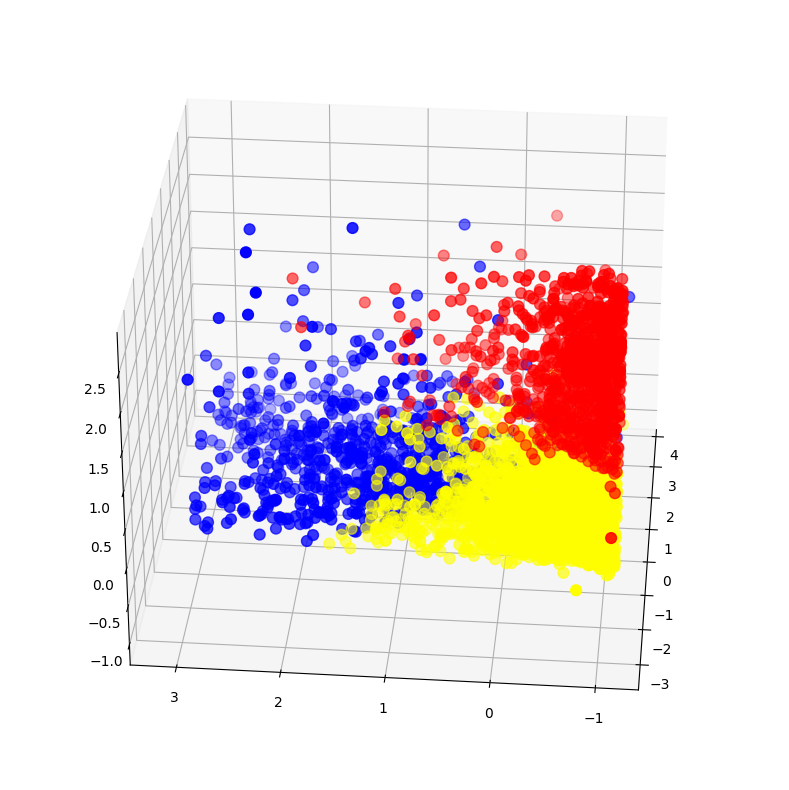

In [43]:
clusters = kmeans.labels_
RFM = rfm_df_scaled 
RFM['labels'] = clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["monetary"][RFM.labels == 0], RFM["frequency"][RFM.labels == 0], RFM["recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["monetary"][RFM.labels == 1],RFM["frequency"][RFM.labels == 1], RFM["recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["monetary"][RFM.labels == 2], RFM["frequency"][RFM.labels == 2], RFM["recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()